# An Introduction to Unsupervised Clustering

Unsupervised clustering is a machine learning technique that groups similar, unlabeled data points into clusters based on inherent patterns. It is used for tasks like market segmentation, anomaly detection, and data compression without prior knowledge of the data's categories.

There are several unsupervised clustering models-check out the [sci-kit learn documentation](https://scikit-learn.org/stable/modules/clustering.html) for a more robust deep dive into the various clustering algorithms in the sklearn.cluster module. We will cover a couple clustering algorithms, but they represent a great foundation to go ahead and understand even the  more advanced methods such as DBSCAN or HDBSCAN.

### Unsupervised Clustering Techniques

#### 1. K-Means Clustering

Hands down the simpliest clustering algorithim, K-means works by grouping/assigning similar points to clusters without labelled data. K-means is known as a hard clustering technique, because each data point can only belong to nearest cluster.The intuition is pretty simple:

1. The algorithim randomly initializes k-cluster centres (centroids)

2. Calculate Euclidian distances of each point to the cluster centre

3. Assign data points to a cluster

4. Update the cluster centres with the mean of assigned data points.

5. Repeat step 3 and 4 until model convergence 

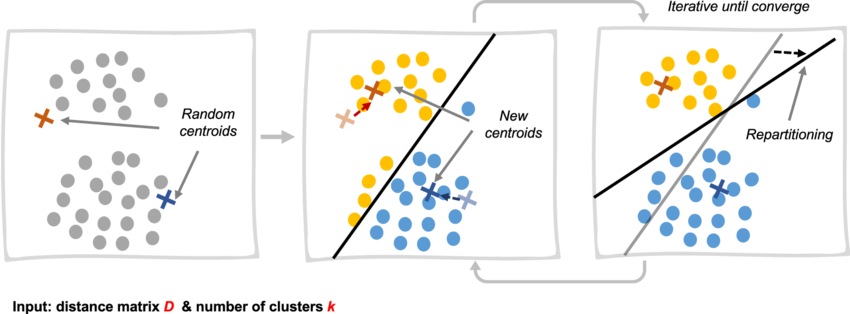

K-means clustering is simple and easy to interpret but is suffers from some major limitations:
1. Computationally expensive and slow- this is because all the data points influence the location of the new cluster centres, meaning for each iteration,computation span the entire dataset.
2. Inaccurate convergence- convergence depends on the initial random initialization.
3. K-means is very sensitive to outliers
4. K-means does not perform well on complex datasets-with complicated over-lapping cluster shapes.

#### 2. Gaussian Mixture Models

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of several Gaussian (normal) distributions with unknown parameters. Unlike hard clustering methods such as K-Means which assign each point to a single cluster based on the closest centroid, GMM performs soft clustering by assigning each point a probability of belonging to multiple clusters.

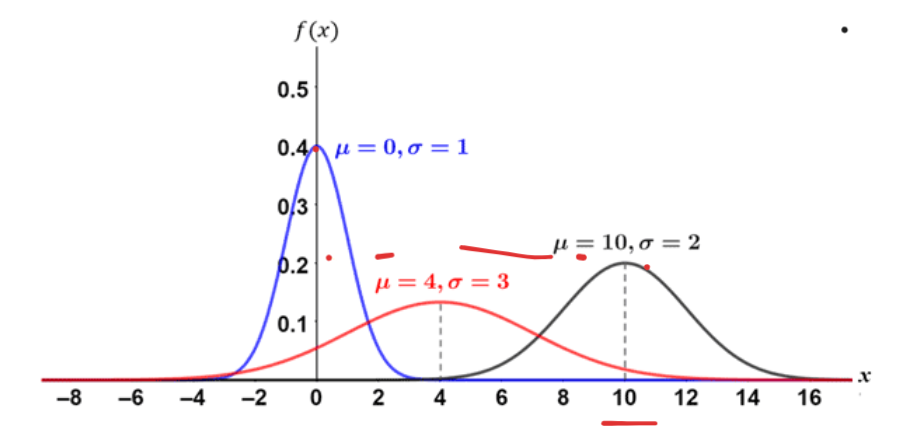

We have understood, that GMM assumes that our dataset was generated by an aggregation of several normal distributions. GMM aims to estimate these normal distributions (gaussian components) that best describe the data. Mathematically, it tries to find the 'building blocks' of a gaussian, which are the mean and the covariance of the gaussian components. The image above, is to illustrate what I mean by building blocks, if I wanted to plot a normal distribution, all I would need is the mean (height) and the variance (the width).

A more descriptive breakdown should be found in the class recordings.

#### Steps in GMM

**1. InitializationGuess the parameters**

Start by randomly guessing initial values for the mean, covariance, and mixing weight for every component cluster (k). You can also use the results from a K-Means run for a better starting guess.

**2. Calculate Responsibilities**

For every single data point, calculate the probability that it belongs to each of the k component clusters, using the current (guessed) parameters. This is like asking, "Given where the cluster centers currently are, how strongly does this point belong to Cluster 1 vs. Cluster 2 vs. Cluster 3?

**3. Update Parameters**

 Use the responsibilities calculated above to re-calculate or update the parameters (mean,covariance,weights) for every component cluster. Such that,the data points that have a high responsibility for a cluster influence that cluster's new parameters more than points with low responsibility. The result is that we move the center and reshaping each cluster so it better fits the points that currently have the highest probability of belonging to it.

**4. Repeat the above 2 steps until convergence**

That is until the parameters stop changing significantly between iterations, or until a maximum number of iterations is reached.

#### 3. Kernel Density Estimation

If you have understood GMM, KDE should be a walk in the park. All KDE does is take GMM to the extreme, instead of initializing k number of normal distributions, KDE plots a normal distribution over each and every observed data point and then tries to smooth it into one aggregate (summation of all the individual normal distributions) density distribution.

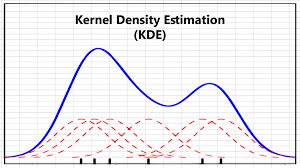

### 4. Hierarchical Clustering

Then we have hierarchical clustering that is used to cluster data by building a multi-level hierarchy of clusters through either merging similar smaller clusters or by dividing larger dissimilar clusters.We have 2 types of hierarchical clustering methods as distinguished below.



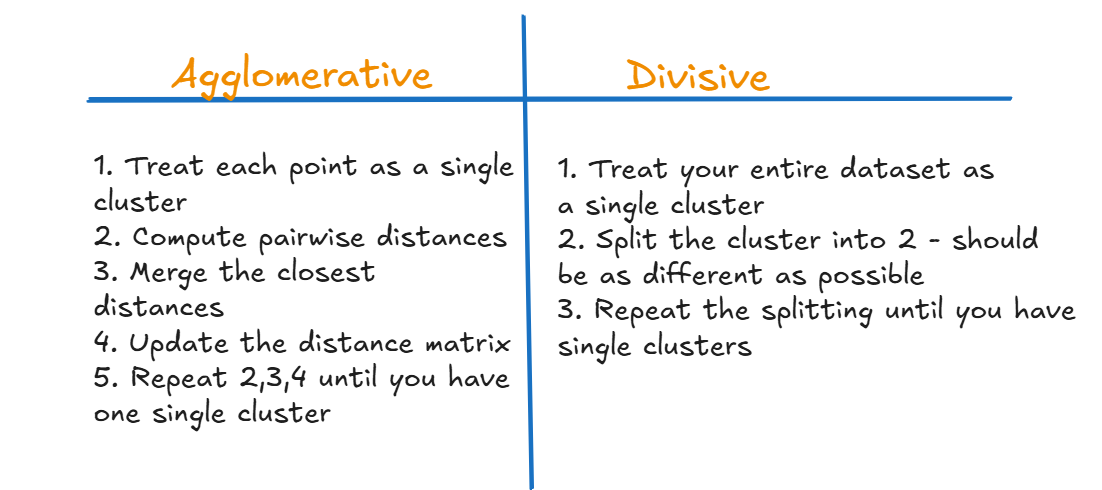

## Unsupervied Clustering Practicum

For our practical session, we are going to do Customer Segmentation which is a very common use case for Unsupervised Clustering. The dataset used for this practical session was from [kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler,RobustScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture


In [2]:
#import and inspect the data
data=pd.read_csv(r'D:\Advanced_Machine_Learning\datasets\Clustering_data.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


As you can see, our data is unlabelled, using unsupervised clustering techniques, we will learn any underlying patterns in our data and use that to group our customers.

In [3]:
#remember all features must be numerical and scaled appropriately
df=data[['Gender']]
df.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [4]:
ohe=OneHotEncoder(sparse_output=False)
ohe_transform=ohe.fit_transform(df)
encoded_df = pd.DataFrame(ohe_transform, columns=ohe.get_feature_names_out(df.columns))
encoded_df.index = df.index
final_df=pd.concat([data,encoded_df],axis=1)

In [5]:
final_df.drop(['Gender','CustomerID'],axis=1,inplace=True)

In [6]:
final_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0


In [7]:
final_df.columns.tolist()

['Age',
 'Annual Income (k$)',
 'Spending Score (1-100)',
 'Gender_Female',
 'Gender_Male']

In [8]:
#now scale the data
scaler=RobustScaler()
X_scaled=scaler.fit_transform(final_df)

#### 1. Applying K-Means Clustering

In [18]:
kmeans = KMeans(n_clusters=5, random_state=0,init='k-means++',n_init="auto").fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


print(centroids)
print("\nCluster Labels for Data Points:")
print(labels)

[[ 1.04761905e+00 -4.03131115e-01 -2.95051354e-01 -1.00000000e+00
   1.00000000e+00]
 [-3.75661376e-01 -2.93542074e-02  4.75256769e-01  2.77555756e-16
  -2.77555756e-16]
 [-3.74802153e-01 -8.95679663e-02  5.41645718e-01 -1.00000000e+00
   1.00000000e+00]
 [ 1.43039591e-01  8.95134624e-01 -7.36533694e-01 -7.24137931e-01
   7.24137931e-01]
 [ 6.31687243e-01 -3.05936073e-01 -3.55664488e-01  1.66533454e-16
  -1.66533454e-16]]

Cluster Labels for Data Points:
[2 2 4 1 4 1 4 1 0 1 0 1 4 1 0 2 4 2 0 1 0 2 4 2 4 2 4 2 4 1 0 1 0 2 4 1 4
 1 4 1 4 2 0 1 4 1 4 1 1 1 4 2 1 0 4 0 4 0 1 0 0 2 4 4 0 2 4 4 2 1 0 4 4 4
 0 2 4 2 1 4 0 2 0 4 1 0 4 1 1 4 4 2 0 4 1 2 4 1 0 2 1 4 0 2 0 1 4 0 0 0 0
 1 4 2 1 1 4 4 4 4 2 4 1 2 1 1 3 2 0 2 3 2 1 1 3 1 4 2 3 1 4 2 1 1 3 2 3 1
 4 2 3 2 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 2 3 2 3 2 4 1 3 2 3 2 3 1 3 1 3
 2 3 2 3 1 3 1 3 1 3 1 3 3 3 3]


<Axes: ylabel='Age'>

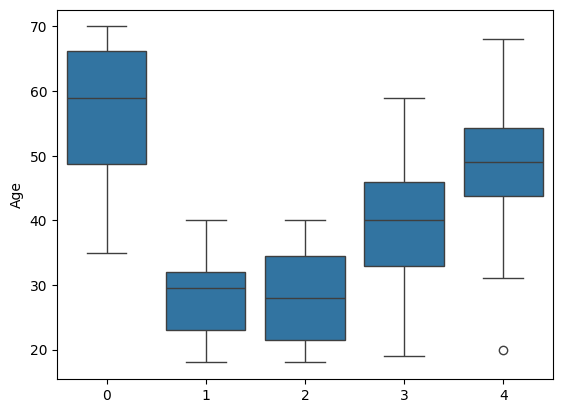

In [20]:
sns.boxplot(x = kmeans.labels_, y = final_df['Age'])

We can evaluate performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a higher score represents a better fit.

In [21]:
silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')

0.3140070312717065

### Choosing the best value of k

The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few. 


##### The Elbow Method
The Elbow Method is based on analyzing the within-cluster sum of squares (WCSS), also called inertia. It works by plotting the total WCSS against different values of 𝑘 (number of clusters) and identifying the "elbow point" where the rate of decrease sharply changes

##### The Silhouette Method
The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters.

In [22]:
inertias = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0,init='k-means++',n_init="auto").fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

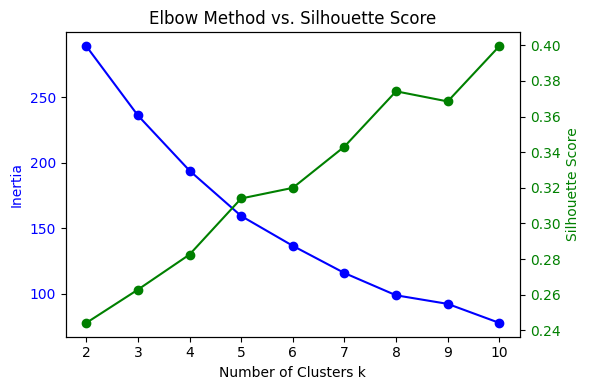

In [23]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Inertia (Elbow Method)
ax1.plot(k_range, inertias, 'bo-', label='Inertia (Elbow)')
ax1.set_xlabel('Number of Clusters k')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', labelcolor='b')

#Silhouette Score
ax2 = ax1.twinx()
ax2.plot(k_range, sil_scores, 'go-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Elbow Method vs. Silhouette Score')
fig.tight_layout()
plt.show()

After you find the best value of k, you rerun your model using it, in this case we have k=8

#### 2. Applying Gaussian Mixture Methods

In [24]:
# Initialize Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=4,covariance_type='full', random_state=42)

# Fit the model
gmm.fit(X_scaled)

# Get cluster labels and probabilities
labels = gmm.predict(X_scaled)
probs = gmm.predict_proba(X_scaled)


<Axes: ylabel='Annual Income (k$)'>

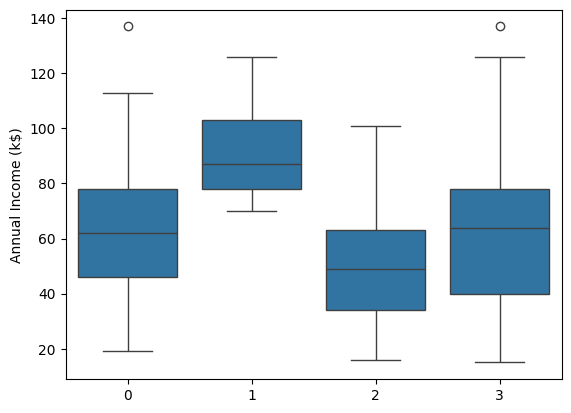

In [25]:
sns.boxplot(x = labels, y = final_df['Annual Income (k$)'])

#### Choosing the best number of gaussian components

 We use information criteria to find the optimal number of components ($K$). These criteria measure how well the model fits the data while penalizing models that use too many parameters (complexity). A lower score is better.

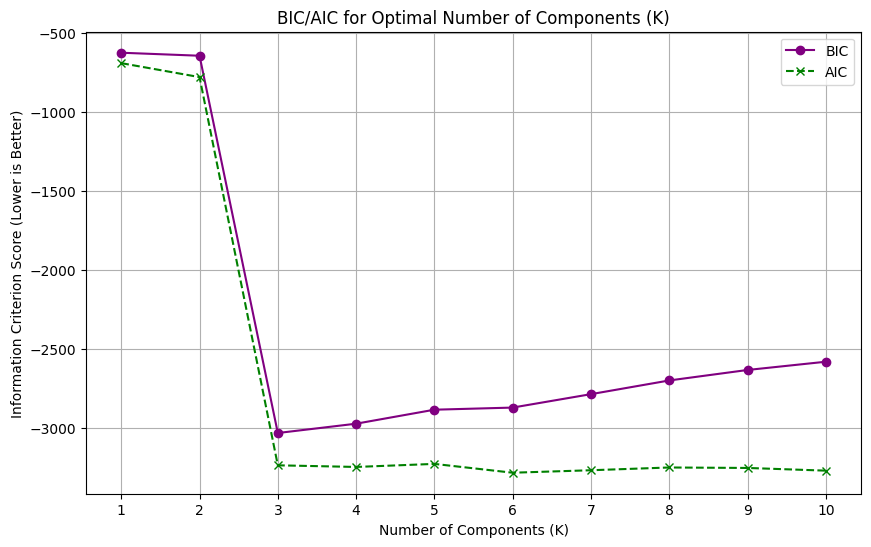

In [26]:
k_range = range(1, 11)
bic = []
aic = []


for k in k_range:
    gmm = GaussianMixture(n_components=k,covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

# 3. Plot the BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, bic, marker='o', linestyle='-', color='purple', label='BIC')
plt.plot(k_range, aic, marker='x', linestyle='--', color='green', label='AIC')
plt.title('BIC/AIC for Optimal Number of Components (K)')
plt.xlabel('Number of Components (K)')
plt.ylabel('Information Criterion Score (Lower is Better)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. It is best to use both.

#### Applying Kernel Density Estimation

#### Applying Hierarchical Clustering